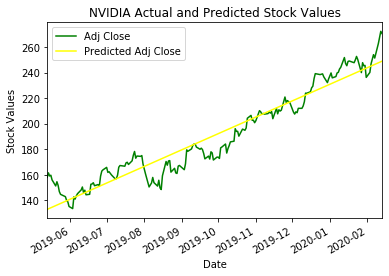

Predicted Adjusted Stock Value for NVIDIA on March 6th, 2020 to be 258.23


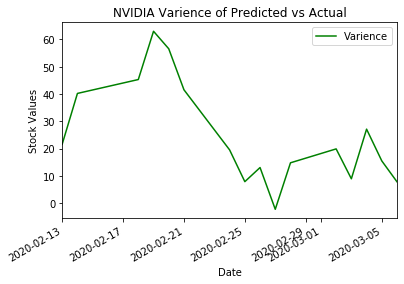

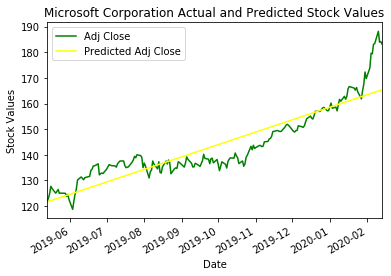

Predicted Adjusted Stock Value for Microsoft Corporation on March 6th, 2020 to be 168.88


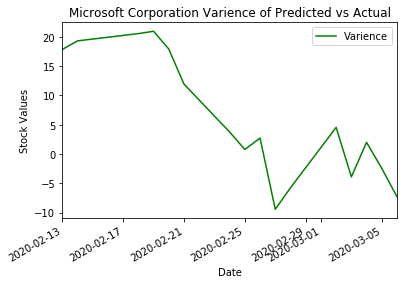

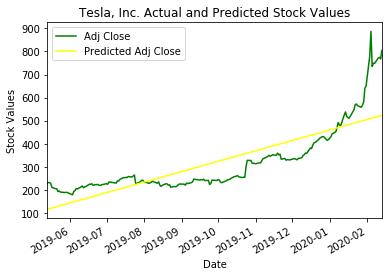

Predicted Adjusted Stock Value for Tesla, Inc. on March 6th, 2020 to be 555.76


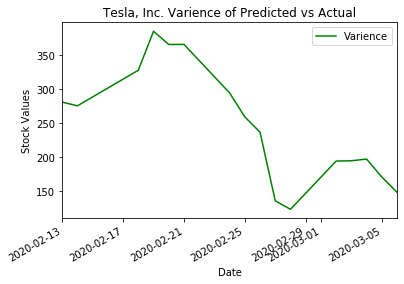

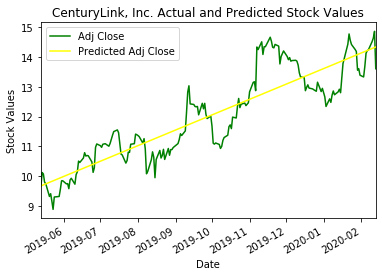

Predicted Adjusted Stock Value for CenturyLink, Inc. on March 6th, 2020 to be 14.7


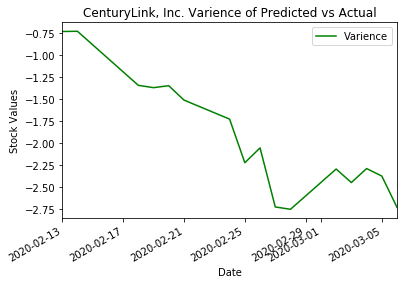

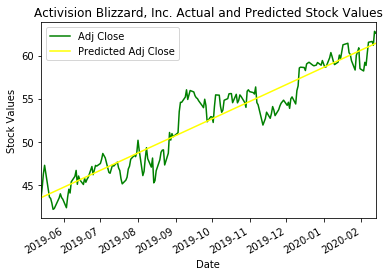

Predicted Adjusted Stock Value for Activision Blizzard, Inc. on March 6th, 2020 to be 62.83


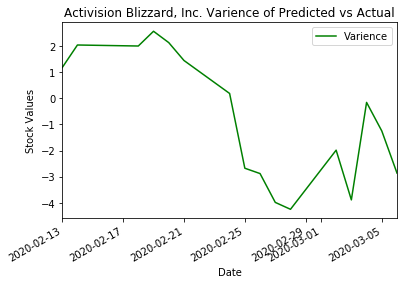

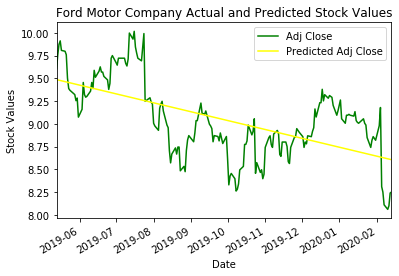

Predicted Adjusted Stock Value for Ford Motor Company on March 6th, 2020 to be 8.54


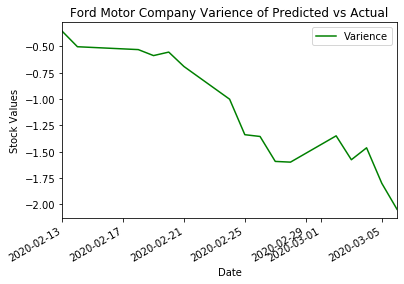

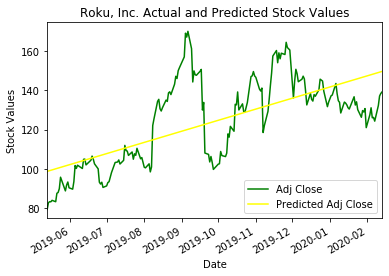

Predicted Adjusted Stock Value for Roku, Inc. on March 6th, 2020 to be 153.53


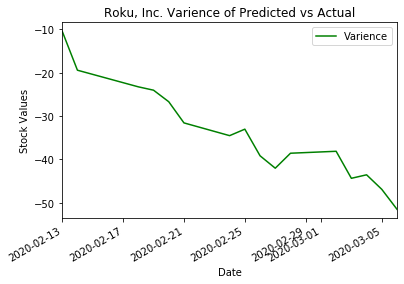

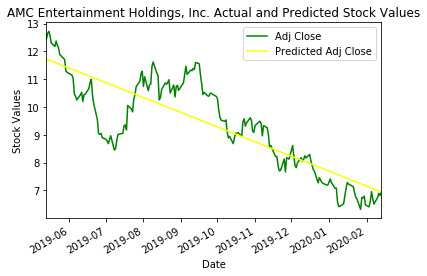

Predicted Adjusted Stock Value for AMC Entertainment Holdings, Inc. on March 6th, 2020 to be 6.57


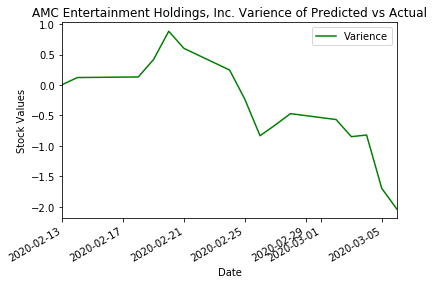

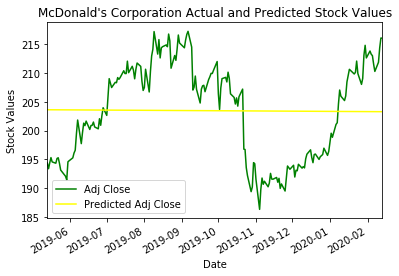

Predicted Adjusted Stock Value for McDonald's Corporation on March 6th, 2020 to be 203.26


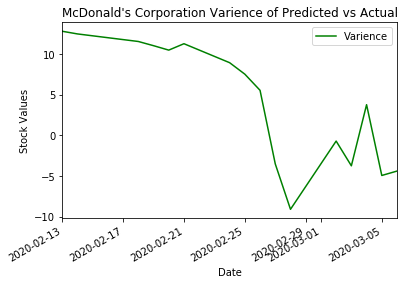

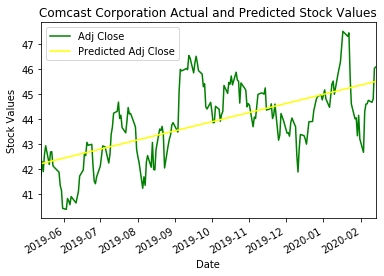

Predicted Adjusted Stock Value for Comcast Corporation on March 6th, 2020 to be 45.76


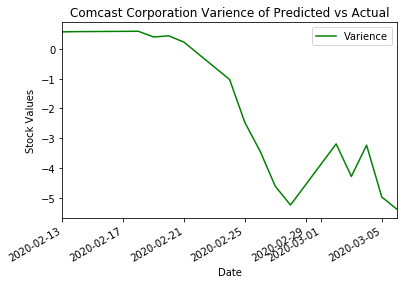

In [1]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# Pass the company name, the symbol for the company as it is on
# Yahoo finance, and the start/end dates used to predict the stocks
# on the last day.
def predict_stocks(companyName, companySymbol, startDate, endDate):
    # Create the data frame
    df = web.DataReader (companySymbol, "yahoo", startDate, endDate)
    df.reset_index (inplace = True, drop = False)
    
    # Setup prediction set
    predictionTimeFrame = pd.date_range (start = endDate, end = "3/6/2020")
    predictionTimeFrame = pd.to_datetime (predictionTimeFrame)
    predictionTimeFrame = predictionTimeFrame.values.astype (float).reshape (-1,1) # Reshape the set
    
    # Do prediciton
    linreg = LinearRegression ()
    linreg.fit (df["Date"].values.reshape (-1, 1), df["Adj Close"].values.reshape (-1, 1))
    df["Predicted Adj Close"] = linreg.predict (df["Date"].values.astype(float).reshape (-1, 1))
    
    # Get the prediction towards the given end date
    predictedStockList = linreg.predict (predictionTimeFrame)

    # Plot the values and display the graph
    axis = df.plot (x = "Date", y = "Adj Close", color = "green")
    df.plot (x = "Date", y = "Predicted Adj Close", color = "yellow", ax = axis)
    
    axis.set_title (companyName + " Actual and Predicted Stock Values")
    axis.set_xlabel ("Date")
    axis.set_ylabel ("Stock Values")
    plt.show ()
    
    # Display what the predicted stock value will be. This is the last element of the predction list.
    print ("Predicted Adjusted Stock Value for " + companyName + " on March 6th, 2020 to be " + str (round (predictedStockList[-1][0],2)))
    
    
    # Create a dataset for the actual data
    dataActual = web.DataReader (companySymbol, "yahoo", endDate, "3/6/2020")
    dataActual.reset_index (inplace = True, drop = False)
    
    # Get the varience between the predicted results and the actual results.
    # Positive values mean the actual stocks were higher than our prediciton while negative values 
    # mean the actual value was lower than our prediciton.
    dates = []
    varience = []  
    for i in range (0, len (dataActual["Date"].values.tolist ())):
        dates.append (dataActual["Date"].values[i])
        varience.append ((dataActual["Adj Close"].values[i] - linreg.predict (
            dataActual["Date"].values[i].astype (float).reshape (-1,1))[0][0]))
    
    # Plot this new graph
    dataDifference = pd.DataFrame ({"Date": dates, "Varience": varience})
    axis = dataDifference.plot (x = "Date", y = "Varience", color = "green")

    axis.set_title (companyName +  " Varience of Predicted vs Actual")
    axis.set_xlabel ("Date")
    axis.set_ylabel ("Stock Values")
    plt.show ()
    
    
def main():
    # Declare list of companies to choose from
    companyNameList = ["NVIDIA", "Microsoft Corporation",
                       "Tesla, Inc.", "CenturyLink, Inc.", 
                       "Activision Blizzard, Inc.", "Ford Motor Company",
                       "Roku, Inc.", "AMC Entertainment Holdings, Inc.", 
                       "McDonald's Corporation", "Comcast Corporation"]
    companySymbolList = ["NVDA", "MSFT", "TSLA", "CTL", "ATVI", "F",
                         "ROKU", "AMC", "MCD", "CMCSA"]
    
    # Loop through each company
    for i in range (0, len (companyNameList)):
        # Predict the stocks with 9 months of data.
        name = companyNameList[i]
        symbol = companySymbolList[i]
        startDate = datetime.datetime (2019, 5, 13)
        endDate = datetime.datetime (2020, 2, 13)
        predict_stocks (name, symbol, startDate, endDate)

if __name__ == "__main__":
    main ()